In [28]:
import os
import glob
import pydicom
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import ndimage

path = "/Users/jahanpd/Downloads/pneumothorax/dicom-images-train"

# USE IF NEEDING TO LABEL AS PTx or NOT
#labels = pd.read_csv("/Users/jahanpd/Downloads/pneumothorax/train-rle.csv")
#normal = []
#for n in range(len(labels)):
#    if "-1" in str(labels[" EncodedPixels"].values[n]):
#        normal.append(labels["ImageId"].values[n])

paths = []
x = np.array(())
y = np.array(())

count = 0
for filename in Path(path).glob('**/*.dcm'):
    paths.append(str(filename))
for filename in paths[0:1]:
    print(filename)
    ds = pydicom.dcmread(filename)
    array = ds.pixel_array
    for theta in range(1,360):
        # rotate image
        rotated = ndimage.rotate(ds.pixel_array, theta, reshape=True)
        sizex, sizey = rotated.shape
        if sizey/2 % 2 == 0:
            pad = int((1512 - sizey)/2)
            # pad upper and lower border
            rotated = np.append(np.append(np.zeros((pad,sizex)),rotated), np.zeros((pad,sizex))).reshape((1512,sizex))
            padded = np.array(())
            # pad left and right border
            for row in rotated:
                padded = np.append(padded, np.append(np.append(np.zeros((pad)), row),np.zeros((pad))))
            x = np.append(x,padded)
            y = np.append(y, ds.pixel_array)
            count += 1 # keep track of size of array

x = x.reshape((count,1512*1512)) # reshape x array
y = y.reshape((count,1024*1024))

print(x[1])
print(y[1])

/Users/jahanpd/Downloads/pneumothorax/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.11610.1517875233.906871/1.2.276.0.7230010.3.1.3.8323329.11610.1517875233.906870/1.2.276.0.7230010.3.1.4.8323329.11610.1517875233.906872.dcm


KeyboardInterrupt: 

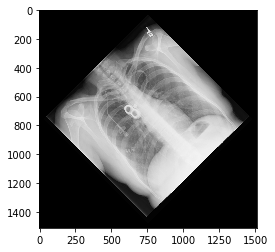

In [18]:
from matplotlib import pyplot as plt

pixels = np.array(x[1], dtype='float')
plt.imshow(pixels, cmap='gray')
plt.show()